Zadanie 5

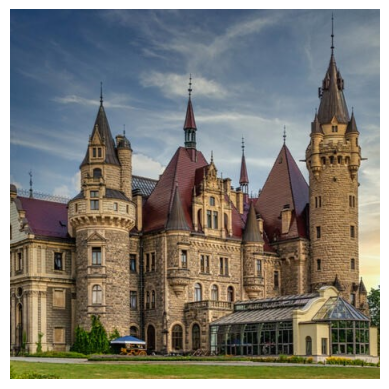

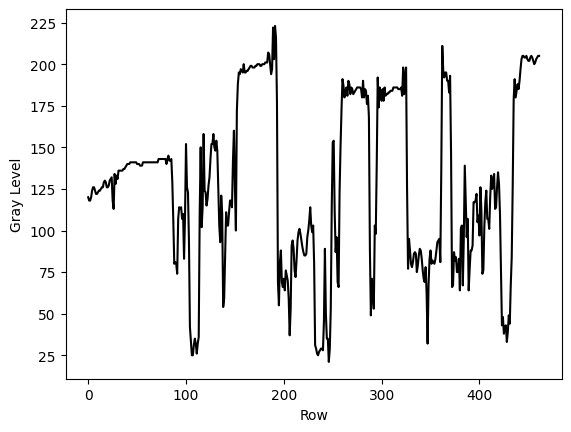

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def display_image(filename):
    image = cv2.imread(filename)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

def plot_gray_levels(filename, x=None, y=None):
    image_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    if x is not None:
        x_values = np.arange(image_gray.shape[1])
        y_values = image_gray[:, x]
        plt.plot(x_values, y_values, 'k')
        plt.xlabel('Column')
    elif y is not None:
        y = np.squeeze(y)
        x_values = np.arange(image_gray.shape[0])
        y_values = image_gray[y, :]
        plt.plot(x_values, y_values, 'k')
        plt.xlabel('Row')
    plt.ylabel('Gray Level')
    plt.show()

def save_subimage(filename, x1, y1, x2, y2, output_filename):
    image = cv2.imread(filename)
    subimage = image[y1:y2, x1:x2]
    cv2.imwrite(output_filename, subimage)

# Przykładowe użycie funkcji
display_image('obraz.jpg')
# plot_gray_levels('obraz.jpg', x=100)
plot_gray_levels('obraz.jpg', y=200)
save_subimage('obraz.jpg', 100, 200, 300, 400, 'podobraz.jpg')


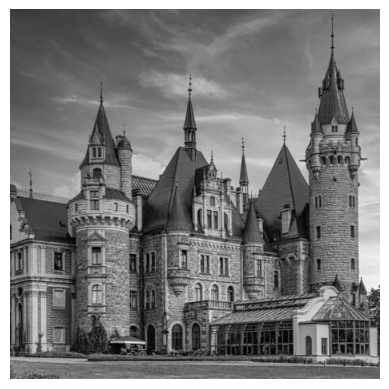

In [19]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Zadanie 6

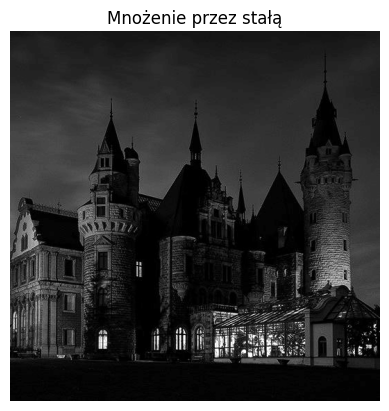

C:\Users\ebron\AppData\Local\Temp\ipykernel_4836\974057428.py:17: RuntimeWarning: divide by zero encountered in divide
  transformed_image = 1 / (1 + (m / image) ** e)


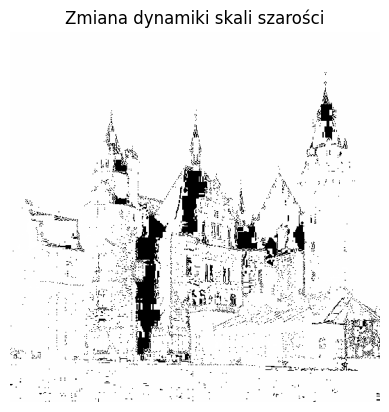

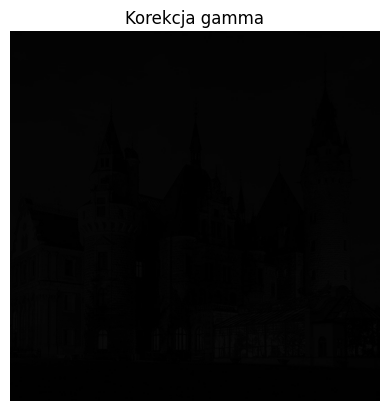

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()

def transform_multiply(image, constant):
    transformed_image = constant * image
    transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)
    return transformed_image

def transform_contrast(image, m, e):
    transformed_image = 1 / (1 + (m / image) ** e)
    transformed_image = np.clip(transformed_image * 255, 0, 255).astype(np.uint8)
    return transformed_image

def transform_gamma(image, c, gamma):
    transformed_image = c * (image ** gamma)
    transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)
    return transformed_image

# Wczytanie przykładowego obrazu
# image = cv2.imread('obraz.jpg', cv2.IMREAD_GRAYSCALE)
# image = cv2.imread('niebo.png', cv2.IMREAD_GRAYSCALE)
image = cv2.imread('ciemny_zamek.jpg', cv2.IMREAD_GRAYSCALE)


# Przekształcenie - mnożenie przez stałą
constant = 2.5
transformed_multiply = transform_multiply(image, constant)
display_image(transformed_multiply, 'Mnożenie przez stałą')

# Przekształcenie - zmiana dynamiki skali szarości (kontrastu)
m = 0.45
e = 8
transformed_contrast = transform_contrast(image, m, e)
display_image(transformed_contrast, 'Zmiana dynamiki skali szarości')

# Przekształcenie - korekcja gamma
c = 1
gamma = 0.5
transformed_gamma = transform_gamma(image, c, gamma)
display_image(transformed_gamma, 'Korekcja gamma')


Zadanie 7

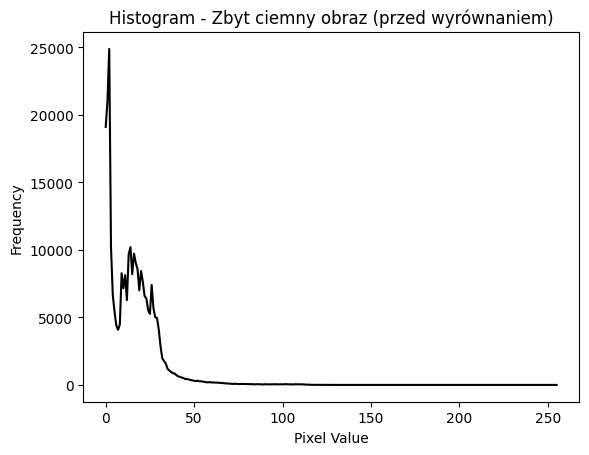

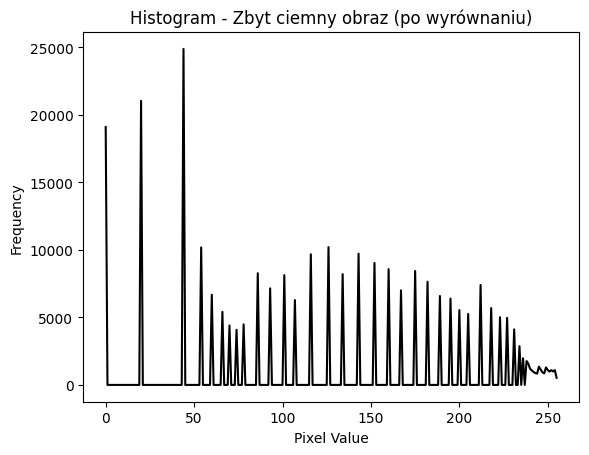

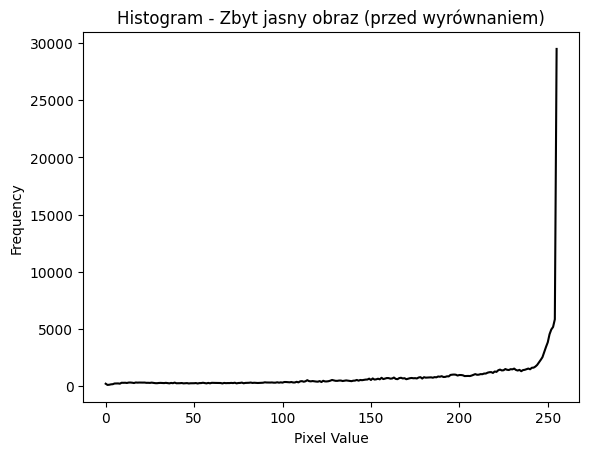

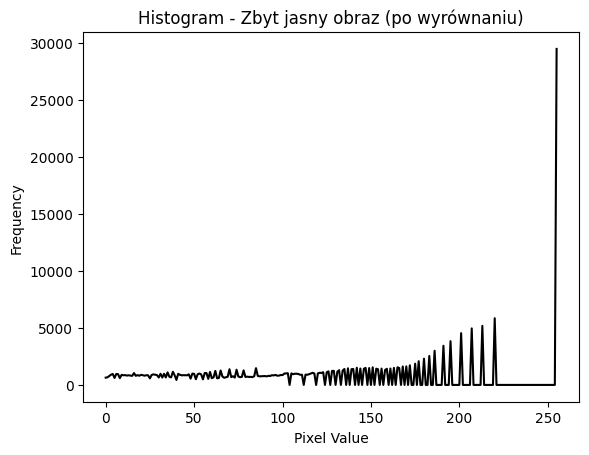

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_histogram(image, title):
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(histogram, color='black')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

def equalize_histogram(image):
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

# Wczytanie obrazu zbyt ciemnego
dark_image = cv2.imread('ciemny_zamek.jpg', cv2.IMREAD_GRAYSCALE)

# Wyrównanie histogramu obrazu zbyt ciemnego
equalized_dark_image = equalize_histogram(dark_image)

# Wyświetlenie histogramów przed i po wyrównaniu dla obrazu zbyt ciemnego
display_histogram(dark_image, 'Histogram - Zbyt ciemny obraz (przed wyrównaniem)')
display_histogram(equalized_dark_image, 'Histogram - Zbyt ciemny obraz (po wyrównaniu)')

# Wczytanie obrazu zbyt jasnego
bright_image = cv2.imread('zbyt_jasny_obraz.jpg', cv2.IMREAD_GRAYSCALE)

# Wyrównanie histogramu obrazu zbyt jasnego
equalized_bright_image = equalize_histogram(bright_image)

# Wyświetlenie histogramów przed i po wyrównaniu dla obrazu zbyt jasnego
display_histogram(bright_image, 'Histogram - Zbyt jasny obraz (przed wyrównaniem)')
display_histogram(equalized_bright_image, 'Histogram - Zbyt jasny obraz (po wyrównaniu)')


Zadanie 8

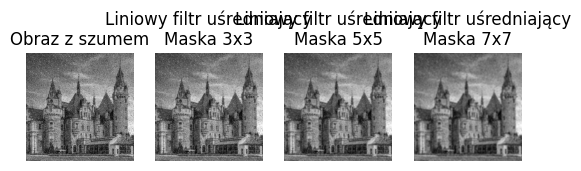

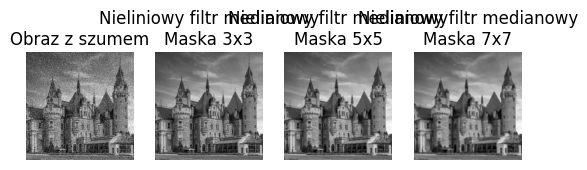

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, noise_ratio):
    noisy_image = image.copy()
    height, width = noisy_image.shape[:2]
    num_noise_pixels = int(noise_ratio * height * width)
    indices = np.random.choice(height * width, num_noise_pixels, replace=False)
    coords = np.unravel_index(indices, (height, width))
    noisy_image[coords] = 255
    noisy_image[coords[::-1]] = 0
    return noisy_image


def apply_linear_filter(image, filter_size):
    filtered_image = cv2.blur(image, (filter_size, filter_size))
    return filtered_image

def apply_median_filter(image, filter_size):
    filtered_image = cv2.medianBlur(image, filter_size)
    return filtered_image

# Wczytanie obrazu
image = cv2.imread('obraz.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Błąd wczytywania obrazu.")
else:
    # Dodanie szumu "sól i pieprz" do obrazu
    noisy_image = add_salt_and_pepper_noise(image, 0.05)

    # Wyświetlenie obrazu z szumem
    plt.subplot(1, 4, 1)
    plt.imshow(noisy_image, cmap='gray')
    plt.title('Obraz z szumem')
    plt.axis('off')

    # Zastosowanie liniowego filtra uśredniającego dla różnych rozmiarów masek
    filter_sizes = [3, 5, 7]
    for i, size in enumerate(filter_sizes):
        filtered_image_linear = apply_linear_filter(noisy_image, size)
        plt.subplot(1, 4, i + 2)
        plt.imshow(filtered_image_linear, cmap='gray')
        plt.title('Liniowy filtr uśredniający\nMaska ' + str(size) + 'x' + str(size))
        plt.axis('off')

    plt.show()

    # Wyświetlenie obrazu z szumem
    plt.subplot(1, 4, 1)
    plt.imshow(noisy_image, cmap='gray')
    plt.title('Obraz z szumem')
    plt.axis('off')

    # Zastosowanie nieliniowego filtra medianowego dla różnych rozmiarów masek
    filter_sizes = [3, 5, 7]
    for i, size in enumerate(filter_sizes):
        filtered_image_median = apply_median_filter(noisy_image, size)
        plt.subplot(1, 4, i + 2)
        plt.imshow(filtered_image_median, cmap='gray')
        plt.title('Nieliniowy filtr medianowy\nMaska ' + str(size) + 'x' + str(size))
        plt.axis('off')

    plt.show()


Zadanie 9

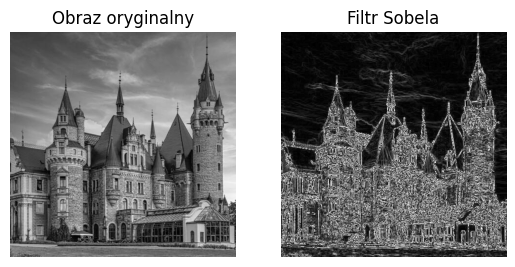

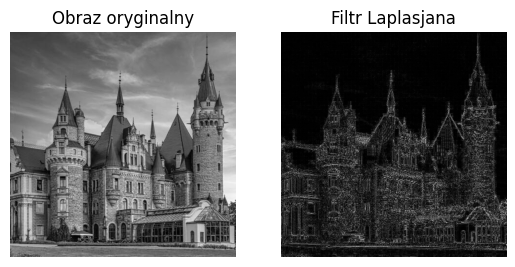

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_sobel_filter(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_result = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
    sobel_result = np.uint8(sobel_result)
    return sobel_result

def apply_laplacian_filter(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    laplacian_result = np.uint8(np.abs(laplacian))
    return laplacian_result

# Wczytanie przykładowego obrazu
image = cv2.imread('obraz.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Błąd wczytywania obrazu.")
else:
    # Zastosowanie filtra Sobela
    sobel_result = apply_sobel_filter(image)

    # Wyświetlenie obrazu oryginalnego i wynikowego z filtrem Sobela
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Obraz oryginalny')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(sobel_result, cmap='gray')
    plt.title('Filtr Sobela')
    plt.axis('off')

    plt.show()

    # Zastosowanie filtra Laplasjana
    laplacian_result = apply_laplacian_filter(image)

    # Wyświetlenie obrazu oryginalnego i wynikowego z filtrem Laplasjana
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Obraz oryginalny')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(laplacian_result, cmap='gray')
    plt.title('Filtr Laplasjana')
    plt.axis('off')

    plt.show()
